In [1]:
import math
import matplotlib.pyplot as plt
from datetime import datetime

#colours
ts_teal = '#00DBBC'
ts_red ='#EB5347'
ts_yellow ='#EBC247'
ts_orange ='#FF8B25'
ts_purple ='#D65BB3'
ts_lblue ='#47C6EB'
ts_fusia ='#E82166'
ts_lime ='#BAEB47'
ts_sand ='#EB7347'
ts_dpurple ='#9747FF'
ts_pblue ='#87FFEE'
ts_dgreen ='#007564'
ts_gray ='#909090'
ts_green ='#00B20F'
ts_brown ='#BD7536'
ts_rblue ='#008BDB'

colours = [ts_teal,
            ts_red,
            ts_yellow,
            ts_orange ,
            ts_purple ,
            ts_lblue ,
            ts_fusia ,
            ts_lime ,
            ts_sand ,
            ts_dpurple ,
            ts_pblue ,
            ts_dgreen ,
            ts_gray ,
            ts_green ,
            ts_brown ,
            ts_rblue]

#plot in dark mode
plt.style.use('dark_background')

In [2]:
token_max = 21000000
blocks_day = 7200
days_entry = 10



In [39]:
## lets get all tao emission daily until we emit it all

def get_tao_blocks(do_print=False):
    tao_blocks =[]
    #first entry is dtao launch
    tao_blocks.append({"block":4920351, "timestamp":1739482871, "emitted_tao":8359419, "halving":0, "excess":0,"avg_sn_excess_price":0})
    
    
    counter = 0 
    
    emitted_tao  = 8359419
    timestamp = 1739482871
    halving = 0
    block = 4920351
    while emitted_tao < token_max-1:
        block +=7200*days_entry
        timestamp += 86400*days_entry
        emitted_tao += (7200*days_entry)*(0.5)**halving
        halving = math.floor(math.log((token_max - emitted_tao)/token_max)/math.log(0.5))
        #when we initilize - we have no idea of the excess - so place in a zero
        tao_blocks.append({"block":block, "timestamp":timestamp, "emitted_tao":emitted_tao, "halving":halving,"excess":0,"avg_sn_excess_price":0})
        if do_print:
            counter +=1
            if counter % 10 ==0:
                print({"block":block, "timestamp":timestamp, "emitted_tao":emitted_tao, "halving":halving,"excess":0,"avg_sn_excess_price":0})
    print(len(tao_blocks))
    return tao_blocks
tao_blocks = get_tao_blocks(True)

{'block': 5640351, 'timestamp': 1748122871, 'emitted_tao': 9079419.0, 'halving': 0, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 6360351, 'timestamp': 1756762871, 'emitted_tao': 9799419.0, 'halving': 0, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 7080351, 'timestamp': 1765402871, 'emitted_tao': 10519419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 7800351, 'timestamp': 1774042871, 'emitted_tao': 10879419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 8520351, 'timestamp': 1782682871, 'emitted_tao': 11239419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 9240351, 'timestamp': 1791322871, 'emitted_tao': 11599419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 9960351, 'timestamp': 1799962871, 'emitted_tao': 11959419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0}
{'block': 10680351, 'timestamp': 1808602871, 'emitted_tao': 12319419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0}
{'block':

In [40]:
print(tao_blocks[3000])

{'block': 220920351, 'timestamp': 4331482871, 'emitted_tao': 20999992.196411133, 'halving': 21, 'excess': 0, 'avg_sn_excess_price': 0}


In [108]:
subnets = [{"name": "OG_subnet1",          "start": 1739482871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0}, 
           {"name": "dtao_subnet",          "start": 1756762871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0},
           {"name": "first_halving_subnet",    "start": 1834522871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0},
           {"name": "first_halving_subnet2",    "start": 1877722871,"price": .05, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0},
           {"name": "second_halving_sn", "start": 1990042871,"price":  .01, "emission_data":{},"last_alpha_block":0, "last_alpha_timestamp":0}, 
           {"name": "fourth_halving_sn", "start": 2206042871,"price":  .01, "emission_data":{},"last_alpha_block":0, "last_alpha_timestamp":0},
          ]
n = len(subnets)
subnet_excesses = [{} for _ in range(n)]
first_excess_timestamp = 0

#we need to recalculate the tao_blocks each time... it holds the excess
tao_blocks =get_tao_blocks(False)

#at each block we need to calculate the emission for each SN
for tao_block in tao_blocks:
    tao_block_number  = tao_block['block']
    if tao_block_number < 951880351:
        #get the tao details
        tao_time = tao_block['timestamp']
        tao_block_number  = tao_block['block']
        tao_halving = tao_block['halving']
        
            
        #we need all the alpha halvings form the last calculation
        alpha_havlings = []
        halving_differences = []
        subnet_prices = []
        last_timestamp  = tao_time - 86400*days_entry

        #we need the already calculated average excess_donating subnet price
        known_average_excess_price =1
        for tb in tao_blocks:
            if tb['timestamp'] == last_timestamp:
                #we can get the avg price
                known_average_excess_price = tb['avg_sn_excess_price']
        
        for subnet in subnets:
            if last_timestamp in subnet['emission_data']:
                subnet_price = subnet['price']
                subnet_prices.append(subnet_price)
                alpha_halving = subnet['emission_data'][last_timestamp]['alpha_halving']
                alpha_havlings.append(alpha_halving)
                halving_differences.append(alpha_halving - tao_halving)
        #print(tao_time, tao_halving, alpha_havlings)
        # scenario 2
        #sum up the differences - not just the presence of a difference
        difference_counter = 0
        excess_contributor_price_sum = 0
        excess_contributor_price_count = 0

        #which subnets get excess
        for index, difference in enumerate(halving_differences):
            if difference >0 and subnet_prices[index]<known_average_excess_price:
                difference_counter+=difference
            if difference <0:
                #these are prices of subnets that are contributing excess
                excess_contributor_price_sum += subnet_prices[index]
                excess_contributor_price_count += 1
        #What is the average price of subnets contributing excess?
        #add this to the tao_block 
        if excess_contributor_price_count >0:
            average_excess_price = excess_contributor_price_sum/excess_contributor_price_count
        else: 
            average_excess_price = 1
        tao_block['avg_sn_excess_price'] = average_excess_price

        for i, subnet in enumerate(subnets):
            start = subnet['start']
            price = subnet['price']
            if start <= last_timestamp:
                
                #this subnet has started emitting alpha
                #lets get the halving at the last entry
                if last_timestamp in subnet['emission_data']:
                    alpha_halving = subnet['emission_data'][last_timestamp]['alpha_halving']
                    tao_in =subnet['emission_data'][last_timestamp]['tao_in']
                    alpha_in =subnet['emission_data'][last_timestamp]['alpha_in']
                    alpha_out = subnet['emission_data'][last_timestamp]['alpha_out']
                else:
                    #new subnet
                    alpha_halving=0
                    tao_in =1
                    alpha_in =1
                    alpha_out = 1
                #print(tao_time, subnet['name'], start, tao_halving, alpha_halving)
                alpha_block_number = tao_block_number
                alpha_time = tao_time
                total_alpha  = alpha_in + alpha_out
    
                #now we change emission pattersn based on halvings
                
                if alpha_halving > tao_halving:
                    #print("excess")
                    #OG subnet
                    #this is the max tao_in - based on the tao halving
                    max_tao_in = (7200*days_entry)* (0.5**tao_halving)*price  #(blocks * tao per block)
                    #actual - using alpha halving since alpha is bigger than tao
                    actual_tao_in = (7200*days_entry)* (0.5**alpha_halving)*price
                    excess_tao = max_tao_in - actual_tao_in
                    
                    #i want to track the first timestamp that there was excess tao accumualted
                    if excess_tao >0 and first_excess_timestamp == 0:
                        first_excess_timestamp = alpha_time
                        print("first excess at: ",alpha_time)
                    
                    #increment the tao in the pool
                    tao_in += actual_tao_in
                    #add the excess into the tao_block
                    tao_block['excess'] += excess_tao
                    #alpha in is based on alpha halving in this case
                    alpha_in += (7200*days_entry)*  ((0.5**alpha_halving)*price)/price #change in tao_in /price
                    #alpha out is unchanged
                    alpha_out +=(7200*days_entry) * (0.5**alpha_halving)
                    total_alpha  = alpha_in + alpha_out
                    #print(max_tao_in, actual_tao_in, excess_tao, alpha_in, total_alpha)
                    #update the alpha halving
                    if total_alpha <token_max-200: 
                        alpha_halving = math.floor(math.log((token_max - total_alpha)/token_max)/math.log(0.5))
                        #print("excess alpha halving", alpha_block_number,alpha_halving)
                        subnet['emission_data'][alpha_time] ={"block":alpha_block_number, "timestamp":alpha_time, "tao_in":tao_in, "alpha_in": alpha_in, "alpha_out": alpha_out,"alpha_halving":alpha_halving, "tao_halving": tao_halving}
                        subnet_excesses[i][alpha_time] = {"max_tao_in":max_tao_in, "actual_tao_in":actual_tao_in, "excess_tao_donated":excess_tao}
                    else:
                        subnet['emission_data'][alpha_time] = subnet['emission_data'][last_timestamp]  
                        #the last block where alpha is emitted
                        if subnet['last_alpha_block'] ==0:
                            subnet['last_alpha_block'] = alpha_block_number
                            subnet['last_alpha_timestamp'] = alpha_time
                
                elif alpha_halving < tao_halving and price< known_average_excess_price:    
                    #this is a newer subnet with a much lower emission. 
                    #We can increase the tao_in and the alpha in with the excess tao

                    # BUT we only subsiduze if the price is blwo the average price of those providing the excess
                    total_excess = tao_block['excess']
    
                    #scenario 2 - we 
                    if difference_counter>0:
                        subnet_halving_difference = tao_halving - alpha_halving
                        subnet_excess_ratio = subnet_halving_difference/difference_counter
                        subnet_excess = total_excess*subnet_excess_ratio
                    else:
                        subnet_excess = 0
                    #tao_in gets a percentage of the excess
                    #alpha in gets that same percentage - converted to alpha
                    #emission is based on tha tao halving
                    block_tao_in = (7200*days_entry)* (0.5**tao_halving)*price + subnet_excess
                    block_alpha_in = (7200*days_entry)*  ((0.5**tao_halving)*price)/price + subnet_excess/price
                    tao_in +=   block_tao_in
                    alpha_in += block_alpha_in
                    #a_out is unchanged
                    alpha_out +=(7200*days_entry) * (0.5**alpha_halving)
                    total_alpha  = alpha_in + alpha_out
                    if total_alpha <token_max-200:
                        alpha_halving = math.floor(math.log((token_max - total_alpha)/token_max)/math.log(0.5))
                        #print(alpha_time, "alpha_halving_math",alpha_halving)
                        #if alpha_halving ==2:
                            #print("total alpha",total_alpha)
                            
                        subnet['emission_data'][alpha_time] ={"block":alpha_block_number, "timestamp":alpha_time, "tao_in":tao_in, "alpha_in": alpha_in, "alpha_out": alpha_out,"alpha_halving":alpha_halving, "tao_halving": tao_halving}
                        subnet_excesses[i][alpha_time] = {"max_tao_in":max_tao_in, "actual_tao_in":actual_tao_in, "excess_tao_received":subnet_excess}
                    else:
                        subnet['emission_data'][alpha_time] = subnet['emission_data'][last_timestamp]
                        #the last block where alpha is emitted
                        if subnet['last_alpha_block'] ==0:
                            subnet['last_alpha_block'] = alpha_block_number
                            subnet['last_alpha_timestamp'] = alpha_time
                
                else:
                    #old emission.. no difference added in 
                    block_tao_in = (7200*days_entry)* (0.5**tao_halving)*price 
                    block_alpha_in = (7200*days_entry)*  ((0.5**tao_halving)*price)/price 
                    tao_in +=   block_tao_in
                    alpha_in += block_alpha_in
                    #a_out is unchanged
                    alpha_out +=(7200*days_entry) * (0.5**alpha_halving)
                    total_alpha  = alpha_in + alpha_out
                    if total_alpha <token_max-200:
                        alpha_halving = math.floor(math.log((token_max - total_alpha)/token_max)/math.log(0.5))
                        #print(alpha_time, "alpha_halving_math",alpha_halving)
                        #if alpha_halving ==2:
                            #print("total alpha",total_alpha)
                            
                        subnet['emission_data'][alpha_time] ={"block":alpha_block_number, "timestamp":alpha_time, "tao_in":tao_in, "alpha_in": alpha_in, "alpha_out": alpha_out,"alpha_halving":alpha_halving, "tao_halving": tao_halving}
                        subnet_excesses[i][alpha_time] = {"max_tao_in":max_tao_in, "actual_tao_in":actual_tao_in, "excess_tao_received":0}
                    else:
                        subnet['emission_data'][alpha_time] = subnet['emission_data'][last_timestamp]
                        #the last block where alpha is emitted
                        if subnet['last_alpha_block'] ==0:
                            subnet['last_alpha_block'] = alpha_block_number
                            subnet['last_alpha_timestamp'] = alpha_time
                    
 

3432
first excess at:  1879450871


In [105]:

for subnet in subnets:
    temp_time = subnet['last_alpha_timestamp']
    date_str = datetime.utcfromtimestamp(temp_time).strftime("%m/%d/%Y")
    print(date_str)

10/08/2058
08/14/2059
09/17/2062
08/07/2066
12/23/2072
06/20/2102


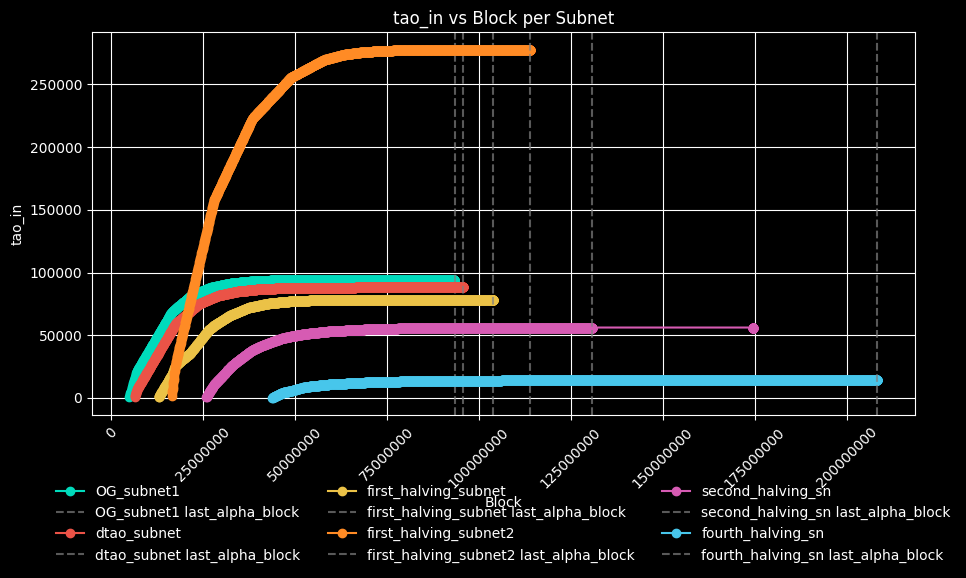

In [106]:
plt.figure(figsize=(10, 6))

for i, subnet in enumerate(subnets):
    emission_data = list(subnet["emission_data"].values())
    blocks = [d["block"] for d in emission_data]
    tao_in = [d["tao_in"] for d in emission_data]
    alpha_in = [d["alpha_in"] for d in emission_data]
    plt.plot(blocks, tao_in, marker="o", label=subnet["name"], color=colours[i])
    # add vertical line if last_alpha_block exists
    if "last_alpha_block" in subnet:
        plt.axvline(
            x=subnet["last_alpha_block"],
            color="gray",
            linestyle="--",
            alpha=0.7,
            label=f"{subnet['name']} last_alpha_block"
        )

chart_data = alpha_in

plt.xlabel("Block")
plt.ylabel("tao_in")
plt.title("tao_in vs Block per Subnet")
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),  # centered, below plot
    ncol=3,                       # number of columns (adjust to fit)
    frameon=False                 # cleaner look
)


plt.grid(True)

# Force full block numbers and rotate
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:

for subnet in subnets:
    temp_time = subnet['last_alpha_timestamp']
    date_str = datetime.utcfromtimestamp(temp_time).strftime("%m/%d/%Y")
    print(date_str)

10/08/2058
08/14/2059
09/17/2062
08/07/2066
12/23/2072
06/20/2102


In [100]:
current_key = 1825882871

for index, subnet in enumerate(subnets):
    print(subnets[index]['name'], subnets[index]['price'])
    if current_key in subnets[index]['emission_data']:
        print(subnets[index]['emission_data'][current_key])
        print(subnet_excesses[index][current_key])
    print("----")


for taoblock in tao_blocks:
    if taoblock['timestamp']== current_key:
        print(taoblock)
print("-------------------")




OG_subnet1 0.01
{'block': 12120351, 'timestamp': 1825882871, 'tao_in': 46441.0, 'alpha_in': 4644001.0, 'alpha_out': 6768001.0, 'alpha_halving': 1, 'tao_halving': 1}
{'max_tao_in': 0.02197265625, 'actual_tao_in': 0.010986328125, 'excess_tao_received': 0}
----
dtao_subnet 0.01
{'block': 12120351, 'timestamp': 1825882871, 'tao_in': 32041.0, 'alpha_in': 3204001.0, 'alpha_out': 5760001.0, 'alpha_halving': 0, 'tao_halving': 1}
{'max_tao_in': 0.02197265625, 'actual_tao_in': 0.010986328125, 'excess_tao_received': 0}
----
first_halving_subnet 0.01
----
first_halving_subnet2 0.05
----
second_halving_sn 0.01
----
fourth_halving_sn 0.01
----
{'block': 12120351, 'timestamp': 1825882871, 'emitted_tao': 13039419.0, 'halving': 1, 'excess': 0, 'avg_sn_excess_price': 0.01}
-------------------


In [80]:
for i, subnet in enumerate(subnets):
    start = subnet['start']
    price = subnet['price']
    name = subnet['name']
    print(i, name)

0 OG_subnet1
1 dtao_subnet
2 first_halving_subnet
3 first_halving_subnet2
4 second_halving_sn
5 fourth_halving_sn
